In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv("../data/TravelInsurancePrediction.csv")

In [23]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data preprocessing

In [24]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [25]:
df_binary_encoded = pd.get_dummies(df)

In [26]:
# Drop unecessary columns
cleaned_df = df_binary_encoded.drop(["Unnamed: 0","Employment Type_Private Sector/Self Employed","GraduateOrNot_No","FrequentFlyer_No","EverTravelledAbroad_No"], axis = 1)
cleaned_df

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,1,0,0
1,31,1250000,7,0,0,0,1,0,0
2,34,500000,4,1,1,0,1,0,0
3,28,700000,3,1,0,0,1,0,0
4,28,700000,8,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,0,1,1,1
1983,28,1750000,5,1,0,0,1,0,1
1984,28,1150000,6,1,0,0,1,0,0
1985,34,1000000,6,0,1,0,1,1,1


In [27]:
X = cleaned_df.drop(["TravelInsurance"], axis = 1)
y = cleaned_df["TravelInsurance"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
# Scaling dataset with binary attributes
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Tuning and trainning model

k: 1, Train/Test Score: 0.911/0.732
k: 3, Train/Test Score: 0.858/0.765
k: 5, Train/Test Score: 0.833/0.781
k: 7, Train/Test Score: 0.826/0.763
k: 9, Train/Test Score: 0.813/0.771
k: 11, Train/Test Score: 0.803/0.777
k: 13, Train/Test Score: 0.800/0.793
k: 15, Train/Test Score: 0.803/0.793
k: 17, Train/Test Score: 0.802/0.787
k: 19, Train/Test Score: 0.800/0.791


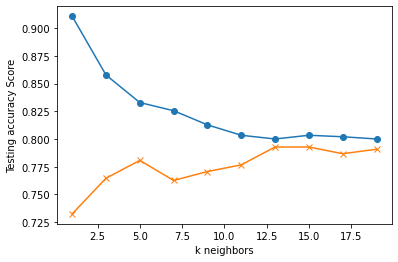

In [30]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## Validate model

In [31]:
# select optimum k
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=13)

In [32]:
predictions = knn.predict(X_test_scaled)

# summary report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                    target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.78      0.94      0.85       321
         Yes       0.83      0.52      0.64       176

    accuracy                           0.79       497
   macro avg       0.81      0.73      0.75       497
weighted avg       0.80      0.79      0.78       497



In [33]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = knn.score(X_test_scaled, y_test)

print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 0.20724346076458752
r2: 0.7927565392354124


## Saving model

In [34]:
# Save simple ML models
import joblib
filename = 'KNNmodel_travel_insurance.sav'
joblib.dump(knn, filename)


['KNNmodel_travel_insurance.sav']

## Prompting for user input

In [35]:
loaded_model  = joblib.load(filename)

In [36]:
# setup questions for user input
criteria = X.columns
criteria

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'Employment Type_Government Sector', 'GraduateOrNot_Yes',
       'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')

In [37]:
# Asking for user input
print("Please answer 0-No 1-Yes")
user_input = []
for question in criteria:
    answer = input(f"{question} :")
    user_input.append(answer)

Please answer 0-No 1-Yes


In [38]:
# scale input before prediction
scaled_user_input = X_scaler.transform([user_input])
scaled_user_input

array([[ 3.54658476, -2.27736843, -0.47460648, -0.62444005, -0.61821456,
         0.41398508, -0.51985308,  2.05622717]])

In [39]:
prediction = ""
if knn.predict(scaled_user_input) == 0:
    prediction = " NOT"

In [40]:
print(f"This customer might{prediction} buy travel insurance!\n"*10)

This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!
This customer might NOT buy travel insurance!

